In [1]:
toliman_settings = {
                    # Eduardo's values:
                    'diam': 0.001 * 2. * 150, 
                    'm1_fl': 0.5717255, 
                    'm1_m2_sep': 0.54933763033373, 
                    'm2_fl': -0.02337895948640,  
                    'bfl': 0.52761,#0.58999999998985,  
                    'm2_rad': 0.00590401477581,
                    'm1_conic': -1.00011470000000,
                    'm2_conic': -1.16799179177759,
                    # Go for 5-fold symmetry to match assumed rosette
                    'm2_strut_width': 0.01,
                    'm2_supports': 5
                    }
prescription_vals = toliman_settings
prescription_vals['beam_ratio'] = 0.2
prescription_vals['tilt_x'] = 0.00
prescription_vals['tilt_y'] = 0.00


In [11]:
%matplotlib inline
import proper
import numpy as np
import matplotlib.pylab as plt

def toliman_plot(settings, prescription):
    wavelength = 0.6 # microns
    gridsize = 2048 #512
    (wavefront, sampling) = proper.prop_run(prescription, wavelength, gridsize, QUIET=True, PRINT_INTENSITY=False, PASSVALUE=settings)

    # Plot entire wavefront
#    plt.imshow(np.log10(wavefront), interpolation = 'None', cmap='viridis')
#    plt.colorbar()
#    plt.show()

    # Log plot
    c = int(gridsize/2)
    sz = 80
    im = wavefront[c-sz:c+sz, c-sz:c+sz]
    #im = np.abs(im)**2 # For if you had NOABS=True
    plt.imshow(np.log10(im), interpolation = 'None', cmap='viridis', clim=[-7, -1.6])
    plt.colorbar()
    plt.show()

    # Linear plot
    # c = gridsize/2
    # sz = 20
    # im = wavefront[c-sz:c+sz, c-sz:c+sz]
    # #im = np.abs(im)**2
    # plt.imshow(im, interpolation = 'None', cmap='viridis')

##  Conic mirrors

-2.00 -2.00


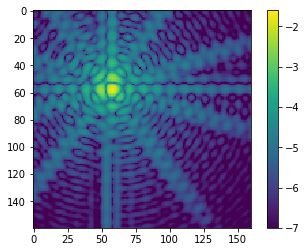

-2.00 -1.00


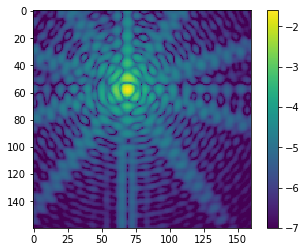

-2.00 0.00


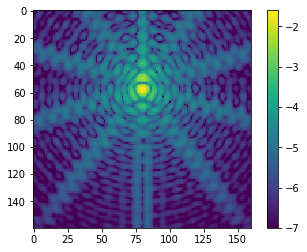

-2.00 1.00


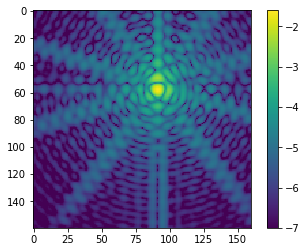

-2.00 2.00


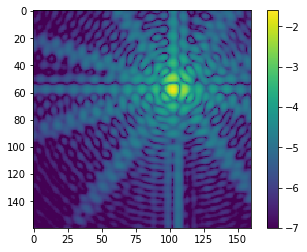

-1.00 -2.00


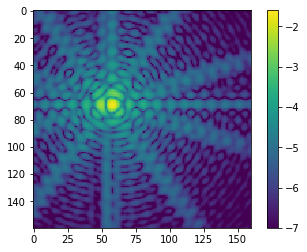

-1.00 -1.00


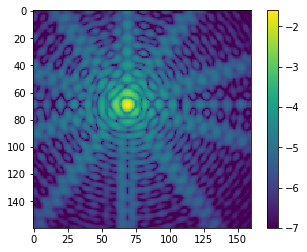

-1.00 0.00


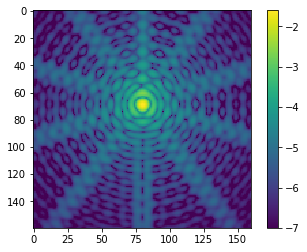

-1.00 1.00


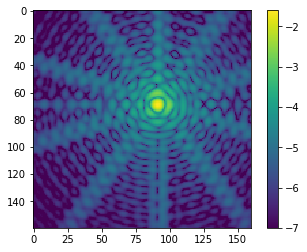

-1.00 2.00


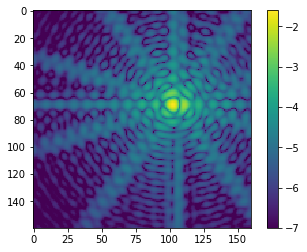

0.00 -2.00


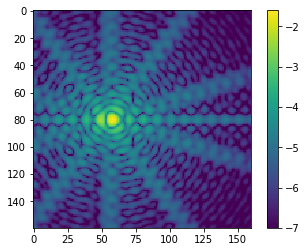

0.00 -1.00


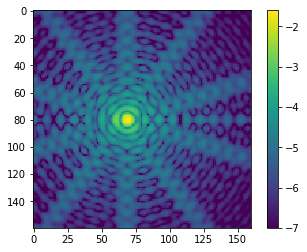

0.00 0.00


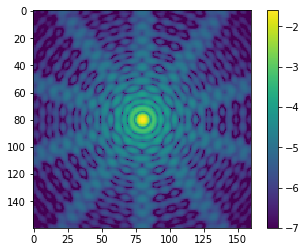

0.00 1.00


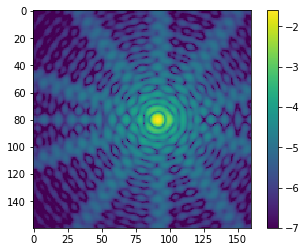

0.00 2.00


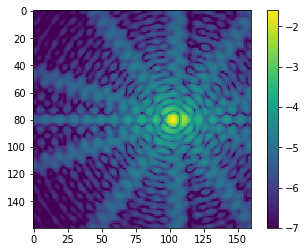

1.00 -2.00


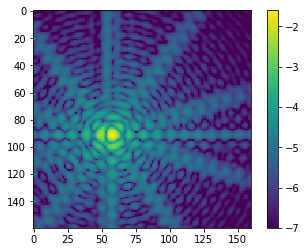

1.00 -1.00


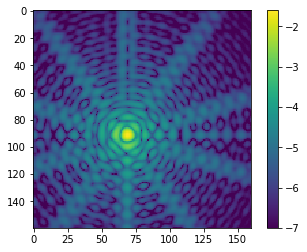

1.00 0.00


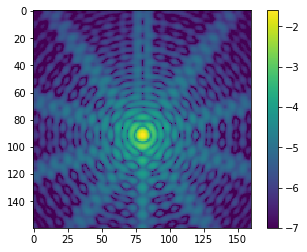

1.00 1.00


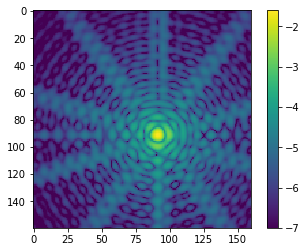

1.00 2.00


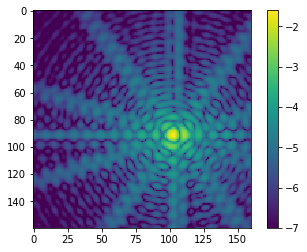

2.00 -2.00


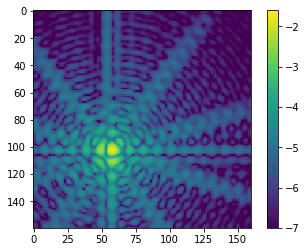

2.00 -1.00


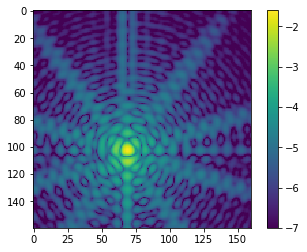

2.00 0.00


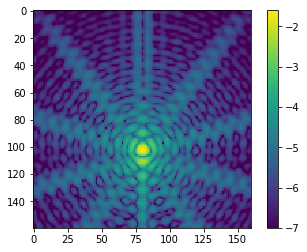

2.00 1.00


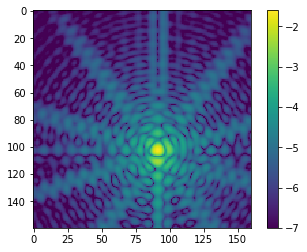

2.00 2.00


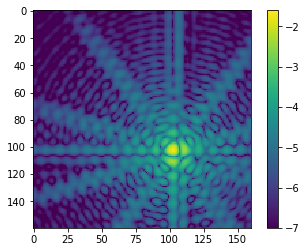

In [13]:
for dx in [-2., -1., 0., 1., 2.]:
    for dy in [-2., -1., 0., 1., 2.]:
        print('{:.2f} {:.2f}'.format(dx, dy))
        prescription_vals['tilt_x'] = dx
        prescription_vals['tilt_y'] = dy
        toliman_plot(prescription_vals, 'prescription_rc_conic')

##  Quadratic (paraboloid) mirrors

-2.00 -2.00


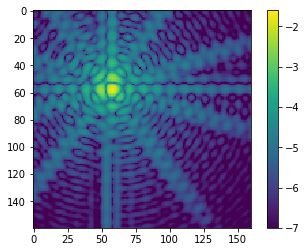

-2.00 -1.00


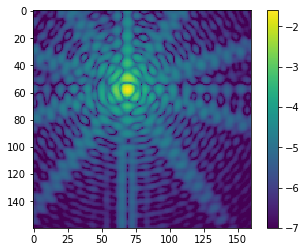

-2.00 0.00


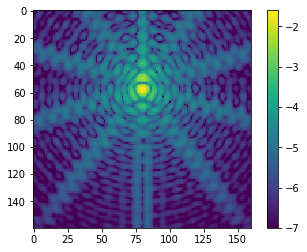

-2.00 1.00


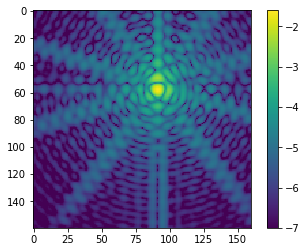

-2.00 2.00


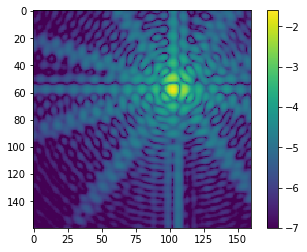

-1.00 -2.00


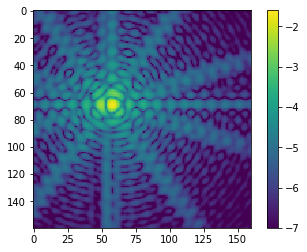

-1.00 -1.00


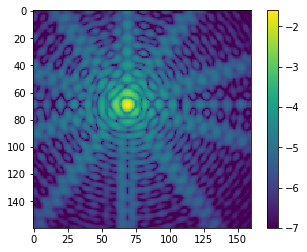

-1.00 0.00


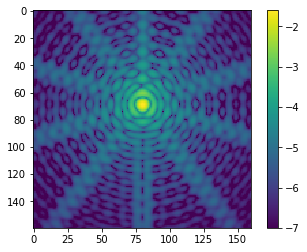

-1.00 1.00


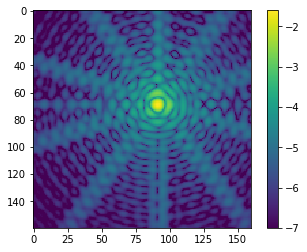

-1.00 2.00


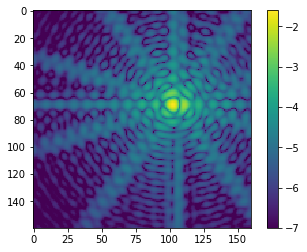

0.00 -2.00


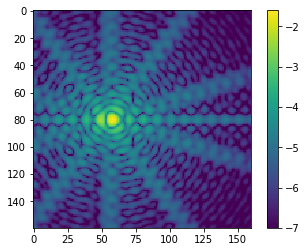

0.00 -1.00


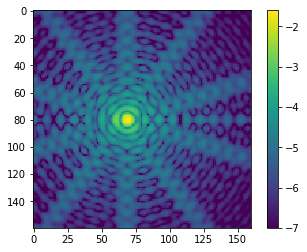

0.00 0.00


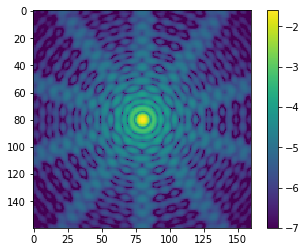

0.00 1.00


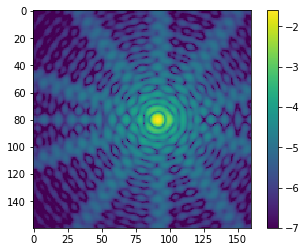

0.00 2.00


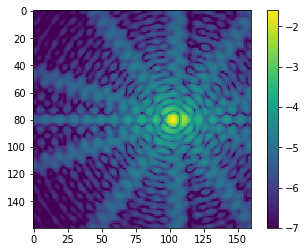

1.00 -2.00


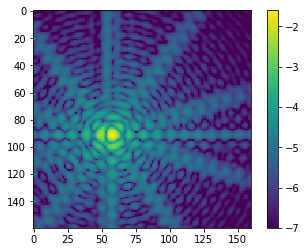

1.00 -1.00


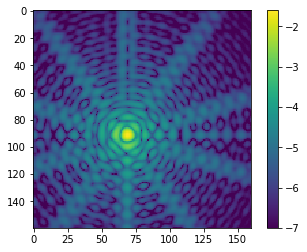

1.00 0.00


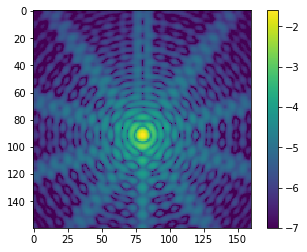

1.00 1.00


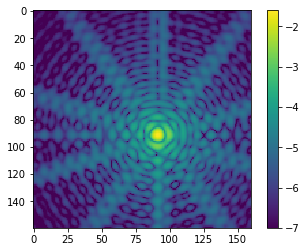

1.00 2.00


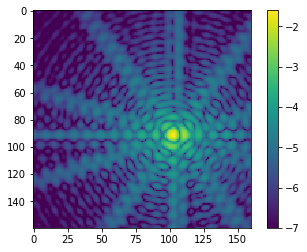

2.00 -2.00


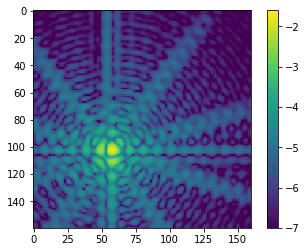

2.00 -1.00


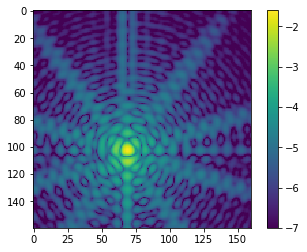

2.00 0.00


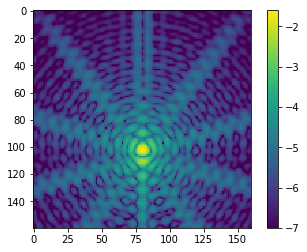

2.00 1.00


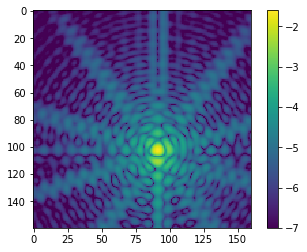

2.00 2.00


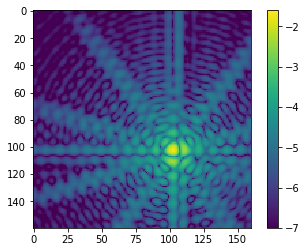

In [14]:
for dx in [-2., -1., 0., 1., 2.]:
    for dy in [-2., -1., 0., 1., 2.]:
        print('{:.2f} {:.2f}'.format(dx, dy))
        prescription_vals['tilt_x'] = dx
        prescription_vals['tilt_y'] = dy
        toliman_plot(prescription_vals, 'prescription_rc_quad')